# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
sns.set()
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

cols=['dice']

dice_df = pd.DataFrame(np.random.randint(low=1,high=7,size=(10, 1)), index=list(range(1,11)),columns=cols)
dice_df

,dice
1,5
2,2
3,4
4,4
5,5
6,5
7,6
8,6
9,6
10,2


#### 2.- Plot the results sorted by value.

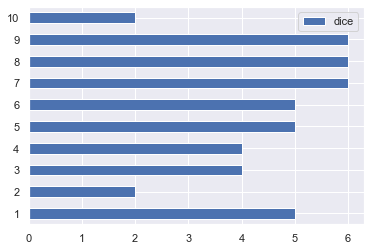

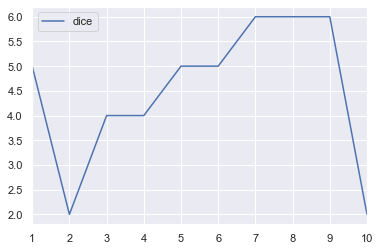

In [3]:
# your code here

dice_df.plot(kind='barh')
dice_df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
dice_df['dice'].value_counts()

6    3
5    3
4    2
2    2
Name: dice, dtype: int64

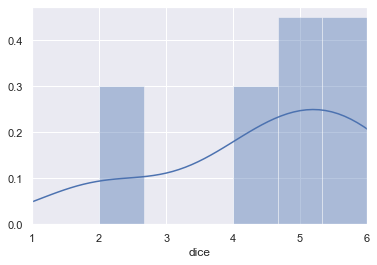

In [5]:
# your code here
fig, ax = plt.subplots()
sns.distplot(dice_df['dice'],bins=6,ax=ax)
ax.set_xlim(1,6)
plt.show()

In [6]:
"""
the 2nd graph gives us information on frequency of appearence of each value (histogram),
whereas the first one only gives information on what was the vale we got on each turn.
"""

'\nthe 2nd graph gives us information on frequency of appearence of each value (histogram),\nwhereas the first one only gives information on what was the vale we got on each turn.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

dice = list(dice_df['dice'])

def my_mean1(x):
    return sum(x)/len(x)
    
dice = list(dice_df['dice']) #was supposed to pass as a data frame? by converting to a list am I cheating the exercise? 
print(dice)
print(my_mean1(dice))

[5, 2, 4, 4, 5, 5, 6, 6, 6, 2]
4.5


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
dice = list(dice_df['dice'])
def my_mean2(x):
    freq=[[i,x.count(i)] for i in set(x)]
    m_freq=[(i[0]*i[1]) for i in freq]
    return sum(m_freq)/len(x)

print(dice)
print(my_mean2(dice))


#like this?

[5, 2, 4, 4, 5, 5, 6, 6, 6, 2]
4.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
dice = list(dice_df['dice'])
def my_median(x):
    s = sorted(x)
    if len(s)%2 == 1:
        return s[int((len(s)/2))]
    elif len(s)%2 == 0:
        return (s[int((len(s)/2))-1] + s[int((len(s)/2))])/2

#print(len(sorted(dice)))        
#print(sorted(dice))
print(my_median(dice))

5.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [35]:
#you mean 3 quartiles right?

dice = list(dice_df['dice'])

def my_q(x):
    s = sorted(x)
    #Q1:
    if len(s)%2 == 1:
        mq = s[int((len(s)/2))]
        s1 = s[0:int((len(s)/2))]
        q1 = (s1[int((len(s1)/2))-1] + s1[int((len(s1)/2))])/2
        s2 = s[((int((len(s)/2)))+1):]
        q3 = (s2[int((len(s2)/2))-1] + s2[int((len(s2)/2))])/2
        return print('first quartile: '+ str(q1) +' | '+ ' MQ: '+ str(mq) +' | '+ ' third quartile: ' + str(q3))
    elif len(s)%2 == 0:
        mq = (s[int((len(s)/2))-1] + s[int((len(s)/2))])/2
        s1 = s[0:int((len(s)/2))-1]
        q1 = s1[int((len(s1)/2))]
        s2 = s[int((len(s)/2)):]
        q3 = s2[int((len(s2)/2))]
        return print('First quartile: '+ str(q1) +' | '+ ' MQ: '+ str(mq) +' | '+ ' third quartile: ' + str(q3))

#print(dice)    
#print(sorted(dice))
print(my_q(dice))


#why am I getting a 'None' in the end?

First quartile: 4 |  MQ: 5.0 |  third quartile: 6
None


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

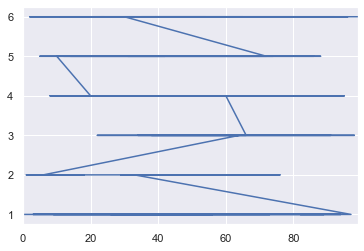

In [53]:
# your code here

df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df.head()
dfsort = df.sort_values('value')
dfsort.head()

dfsort['value'].plot()

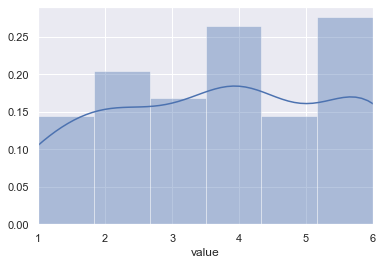

In [56]:
#plot with histogram

fig, ax = plt.subplots()
sns.distplot(dfsort['value'],bins=6,ax=ax)
ax.set_xlim(1,6)
plt.show()

In [57]:
"""
From this last graph:
I can tell the frequency of each value (of the dice) that got out.
In other words it give us the frequency distribution.
"""

'\nI can tell the frequency each value (of the dice) got out\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [61]:
# your code here
values = list(dfsort['value'])
print(my_mean2(values))

3.74


#### 3.- Now, calculate the frequency distribution.


In [63]:
# your code here
def freq(x):
    return [[i,x.count(i)] for i in set(x)]

print(freq(values))

[[1, 12], [2, 17], [3, 14], [4, 22], [5, 12], [6, 23]]
(100, 3)


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [15]:
# your code here

#see above

In [16]:
"""
see above
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

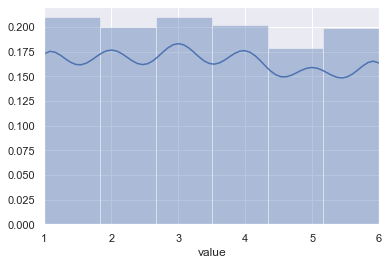

In [65]:
# your code here
th = pd.read_csv('../data/roll_the_dice_thousand.csv')
thsort = th.sort_values('value')

fig, ax = plt.subplots()
sns.distplot(thsort['value'],bins=6,ax=ax)
ax.set_xlim(1,6)
plt.show()

In [18]:
"""
the distribution got more uniform with thousand events than with just hundred.

did some research and found this:
"In the context of probability distributions, uniform distribution refers to a probability 
distribution for which all of the values that a random variable can take on occur 
with equal probability." - which is the case for throwing the dice: the more times I throw it, the more
I will verify that the it is equally probable getting each value

"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

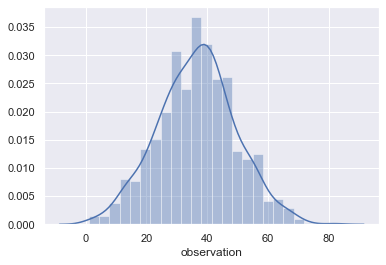

In [70]:
# your code here
age = pd.read_csv('../data/ages_population.csv')
#agesort = age.sort_values('value')
age.head()

fig, ax = plt.subplots()
sns.distplot(age['observation'], ax=ax)
plt.show()

#guess:
#mean = 39
#stdev = 20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [76]:
# your code here
print(f" Median: {age['observation'].mean()}")
print(f" Standar deviation: {age['observation'].std()}")

 Median: 36.56
 Standar deviation: 12.81649962597677


In [21]:
"""
the median yes but not really the standard deviation.
for the last I tried to picture a normal distribution and recalling the empirical rule 68-95-99.7
and the area under the normal distribution (where it goes mean+/-stdev to the sides) according with that rule.
In the end was just doing 34.1% of my guess (68%/2).
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

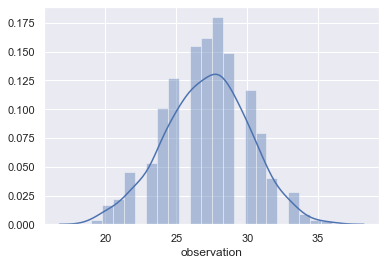

In [79]:
# your code here

age2 = pd.read_csv('../data/ages_population2.csv')
age2.head()

fig, ax = plt.subplots()
sns.distplot(age2['observation'], ax=ax)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
The distribution still remains normal, although I see some gaps there! ages groups missing?
Also, our range of ages is now narrown, only between ~20 and 35
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [81]:
# your code here

print(f" Median: {age2['observation'].mean()}")
print(f" Standar deviation: {age2['observation'].std()}")

 Median: 27.155
 Standar deviation: 2.9698139326891835


In [25]:
"""
the mean decresead (and that we can clearly see from the graph.
what is interesting is the substantial decrease of the stdev, due of course to a narrow interval of range of ages.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

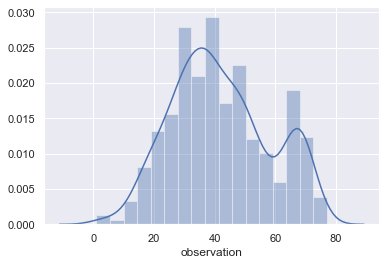

In [86]:
# your code here
age3 = pd.read_csv('../data/ages_population3.csv')
age3.head()

fig, ax = plt.subplots()
sns.distplot(age3['observation'], ax=ax)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [87]:
# your code here
print(f" Median: {age3['observation'].mean()}")
print(f" Standar deviation: {age3['observation'].std()}")

 Median: 41.989
 Standar deviation: 16.14470595986593


In [28]:
"""
the increase on ages around 70 is pushing the mean to the right.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [91]:
# your code here
#age3['observation'].quantile([0.25,0.5,0.75])
ages3 = list(age3['observation'])
print(my_q(ages3))

First quartile: 30.0 |  MQ: 40.0 |  third quartile: 53.0
None


In [92]:
"""
mean is about the same as the median, so there aren't many outliers (i think)
"""

"\nage3['observation'].quantile([0.95])\n"

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [95]:
# your code here
age3['observation'].quantile([0.05,0.95,1.0])

0.05    17.0
0.95    70.0
1.00    77.0
Name: observation, dtype: float64

In [32]:
"""

"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'